In [1]:
import os
import glob
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from cdt.metrics import SID
import utils

Detecting 1 CUDA device(s).


# Import Data

In [2]:
current_directory = os.getcwd()

result_path = 'results'

result_path = os.path.join(current_directory, result_path)

In [64]:
def compute_SID(function_type, method):
    d_values = [10, 20, 30, 40]
    for d in d_values:
        #print("d: ", d)
        files = glob.glob(os.path.join(result_path, f'{method}_function_type_{function_type}_d{d}_seed*'))
        for filename in files:
            with open(filename, 'r') as file:
                data1 = json.load(file)
                B_true = np.array(data1['B_true'])
                filename_current = filename.split('function_type')
                filename_current = f'{method}_function_type' + filename_current[-1]
                filename_current = os.path.join(result_path, filename_current)
                with open(filename_current, 'r') as file:
                    data2 = json.load(file)
                if method == 'RKHS':
                    W_est = np.array(data2['W_est_no_thresh'])
                    W_est = W_est * (W_est > 0.05)
                else:
                    W_est = np.array(data2['W_est'])
                # print("B_true: ", B_true)
                # print("W_est: ", W_est)
                sid = SID(B_true, W_est != 0).item()
                #print("sid: ", sid)
                data2["SID"] = sid
                with open(filename_current, 'w') as file:
                    json.dump(data2, file, indent=4)

In [65]:
for function_type in ["gp", "gp-add", "mlp"]:
    for method in ['RKHS', "NOTEARS_MLP", "NOTEARS_SOB"]:
        compute_SID(function_type, method)

In [3]:
def analyse(function_type, measure, method_list, color):
    palette_dict = {method_list[0]: "red", method_list[1]: color}
    d_values = [10, 20, 30, 40]
    all_data = pd.DataFrame()
    for method in method_list:
        for d in d_values:
            files = glob.glob(os.path.join(result_path, f'{method}_function_type_{function_type}_d{d}_seed*'))
            results = []
            for filename in files:
                with open(filename, 'r') as file:
                    data = json.load(file)
                    measure_value = data[f'{measure}']
                    results.append(measure_value)

            temp_df = pd.DataFrame({
                'd': [d] * len(results),
                'Results': results,
                'Method': [method] * len(results)
            })
            print(temp_df)
            all_data = pd.concat([all_data, temp_df], ignore_index=True)
    sns.boxplot(x='d', y='Results', hue='Method', data=all_data, palette=palette_dict)
    plt.title(f'{function_type}')
    plt.xlabel('d value')
    plt.ylabel(f'{measure}')
    plt.show()

# F1

    d   Results Method
0  10  0.524590   RKHS
1  10  0.260870   RKHS
2  10  0.566667   RKHS
3  10  0.426230   RKHS
4  10  0.266667   RKHS
5  10  0.205882   RKHS
6  10  0.354839   RKHS
7  10  0.344828   RKHS
8  10  0.237288   RKHS
9  10  0.222222   RKHS
    d   Results Method
0  20  0.196078   RKHS
1  20  0.158416   RKHS
2  20  0.156863   RKHS
3  20  0.086022   RKHS
4  20  0.155340   RKHS
5  20  0.164948   RKHS
6  20  0.100000   RKHS
7  20  0.153846   RKHS
8  20  0.079208   RKHS
9  20  0.125000   RKHS
    d   Results Method
0  30  0.169935   RKHS
1  30  0.157895   RKHS
2  30  0.195402   RKHS
3  30  0.120482   RKHS
4  30  0.193939   RKHS
5  30  0.240964   RKHS
6  30  0.248521   RKHS
7  30  0.154839   RKHS
8  30  0.196319   RKHS
9  30  0.128205   RKHS
    d   Results Method
0  40  0.075269   RKHS
1  40  0.158416   RKHS
2  40  0.120219   RKHS
3  40  0.080402   RKHS
4  40  0.103627   RKHS
5  40  0.063158   RKHS
6  40  0.061224   RKHS
7  40  0.113990   RKHS
8  40  0.185366   RKHS
9  40  0.14

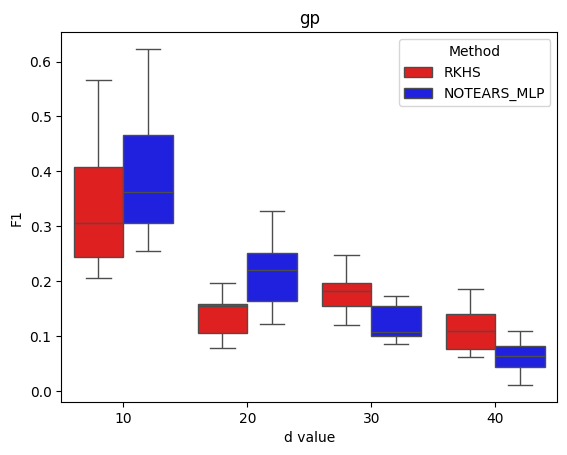

In [4]:
analyse('gp', 'F1', ['RKHS', 'NOTEARS_MLP'], 'blue')

    d   Results Method
0  10  0.684211   RKHS
1  10  0.717949   RKHS
2  10  0.694444   RKHS
3  10  0.769231   RKHS
4  10  0.750000   RKHS
5  10  0.701299   RKHS
6  10  0.705882   RKHS
7  10  0.739726   RKHS
8  10  0.831169   RKHS
9  10  0.756757   RKHS
    d   Results Method
0  20  0.362069   RKHS
1  20  0.247619   RKHS
2  20  0.261682   RKHS
3  20  0.315789   RKHS
4  20  0.330275   RKHS
5  20  0.306306   RKHS
6  20  0.291262   RKHS
7  20  0.321429   RKHS
8  20  0.368000   RKHS
9  20  0.400000   RKHS
    d   Results Method
0  30  0.253165   RKHS
1  30  0.371795   RKHS
2  30  0.289474   RKHS
3  30  0.268456   RKHS
4  30  0.263158   RKHS
5  30  0.264151   RKHS
6  30  0.300000   RKHS
7  30  0.267516   RKHS
8  30  0.202703   RKHS
9  30  0.293333   RKHS
    d   Results Method
0  40  0.160428   RKHS
1  40  0.112360   RKHS
2  40  0.161290   RKHS
3  40  0.139037   RKHS
4  40  0.189474   RKHS
5  40  0.217617   RKHS
6  40  0.208333   RKHS
7  40  0.210526   RKHS
8  40  0.186813   RKHS
9  40  0.13

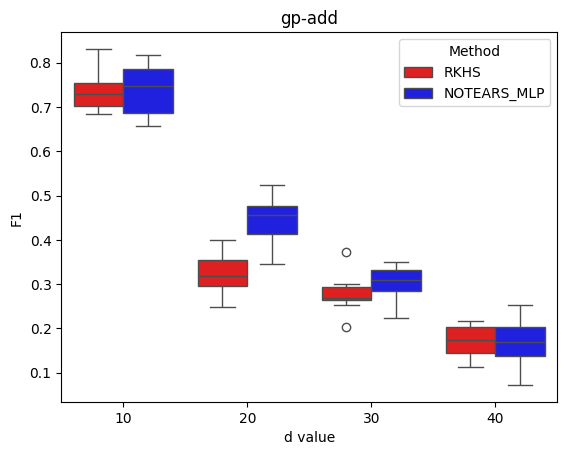

In [5]:
analyse('gp-add', 'F1', ['RKHS', 'NOTEARS_MLP'], 'blue')

    d   Results Method
0  10  0.756098   RKHS
1  10  0.575000   RKHS
2  10  0.365854   RKHS
3  10  0.617284   RKHS
4  10  0.641026   RKHS
5  10  0.506024   RKHS
6  10  0.592593   RKHS
7  10  0.682353   RKHS
8  10  0.609756   RKHS
9  10  0.433735   RKHS
    d   Results Method
0  20  0.201439   RKHS
1  20  0.236025   RKHS
2  20  0.233918   RKHS
3  20  0.234483   RKHS
4  20  0.169014   RKHS
5  20  0.352273   RKHS
6  20  0.257669   RKHS
7  20  0.289474   RKHS
8  20  0.329268   RKHS
9  20  0.285714   RKHS
    d   Results Method
0  30  0.173410   RKHS
1  30  0.206897   RKHS
2  30  0.088398   RKHS
3  30  0.202899   RKHS
4  30  0.200913   RKHS
5  30  0.104712   RKHS
6  30  0.098361   RKHS
7  30  0.024691   RKHS
8  30  0.131980   RKHS
9  30  0.104651   RKHS
    d   Results Method
0  40  0.009615   RKHS
1  40  0.063348   RKHS
2  40  0.010256   RKHS
3  40  0.094787   RKHS
4  40  0.143460   RKHS
5  40  0.038095   RKHS
6  40  0.000000   RKHS
7  40  0.028708   RKHS
8  40  0.000000   RKHS
9  40  0.07

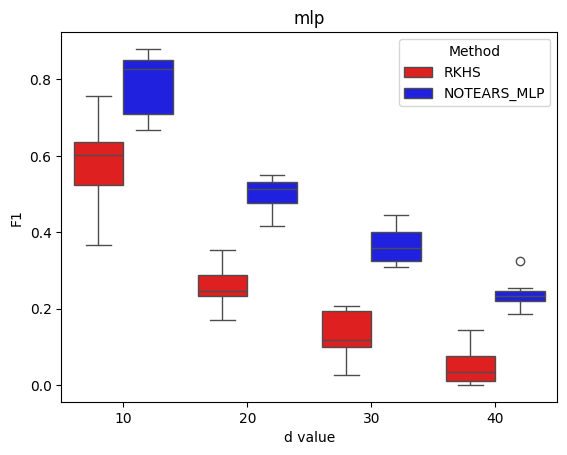

In [86]:
analyse('mlp', 'F1', ['RKHS', 'NOTEARS_MLP'], 'blue')

    d   Results Method
0  10  0.694444   RKHS
1  10  0.687500   RKHS
2  10  0.891892   RKHS
3  10  0.750000   RKHS
4  10  0.705882   RKHS
5  10  0.788732   RKHS
6  10  0.645161   RKHS
7  10  0.805556   RKHS
8  10  0.656250   RKHS
9  10  0.655738   RKHS
    d   Results Method
0  20  0.444444   RKHS
1  20  0.313725   RKHS
2  20  0.355140   RKHS
3  20  0.403670   RKHS
4  20  0.415094   RKHS
5  20  0.365385   RKHS
6  20  0.336449   RKHS
7  20  0.330097   RKHS
8  20  0.407767   RKHS
9  20  0.456140   RKHS
    d   Results Method
0  30  0.300000   RKHS
1  30  0.361582   RKHS
2  30  0.414201   RKHS
3  30  0.262500   RKHS
4  30  0.261905   RKHS
5  30  0.323353   RKHS
6  30  0.327044   RKHS
7  30  0.370370   RKHS
8  30  0.360248   RKHS
9  30  0.233766   RKHS
    d   Results Method
0  40  0.262136   RKHS
1  40  0.248705   RKHS
2  40  0.261780   RKHS
3  40  0.192513   RKHS
4  40  0.301508   RKHS
5  40  0.088496   RKHS
6  40  0.260000   RKHS
7  40  0.378641   RKHS
8  40  0.239583   RKHS
9  40  0.30

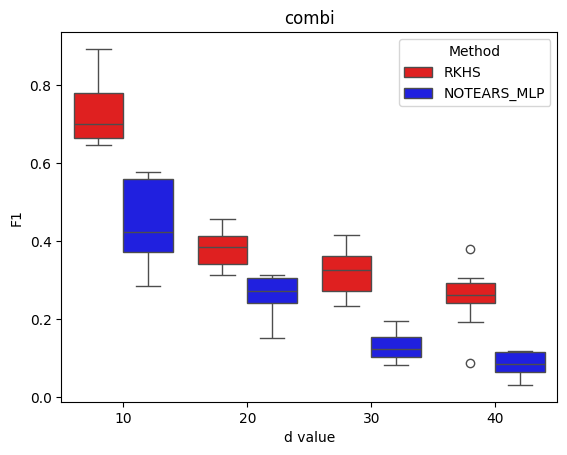

In [87]:
analyse('combi', 'F1', ['RKHS', 'NOTEARS_MLP'], 'blue')

    d   Results Method
0  10  0.524590   RKHS
1  10  0.260870   RKHS
2  10  0.566667   RKHS
3  10  0.426230   RKHS
4  10  0.266667   RKHS
5  10  0.205882   RKHS
6  10  0.354839   RKHS
7  10  0.344828   RKHS
8  10  0.237288   RKHS
9  10  0.222222   RKHS
    d   Results Method
0  20  0.196078   RKHS
1  20  0.158416   RKHS
2  20  0.156863   RKHS
3  20  0.086022   RKHS
4  20  0.155340   RKHS
5  20  0.164948   RKHS
6  20  0.100000   RKHS
7  20  0.153846   RKHS
8  20  0.079208   RKHS
9  20  0.125000   RKHS
    d   Results Method
0  30  0.169935   RKHS
1  30  0.157895   RKHS
2  30  0.195402   RKHS
3  30  0.120482   RKHS
4  30  0.193939   RKHS
5  30  0.240964   RKHS
6  30  0.248521   RKHS
7  30  0.154839   RKHS
8  30  0.196319   RKHS
9  30  0.128205   RKHS
    d   Results Method
0  40  0.075269   RKHS
1  40  0.158416   RKHS
2  40  0.120219   RKHS
3  40  0.080402   RKHS
4  40  0.103627   RKHS
5  40  0.063158   RKHS
6  40  0.061224   RKHS
7  40  0.113990   RKHS
8  40  0.185366   RKHS
9  40  0.14

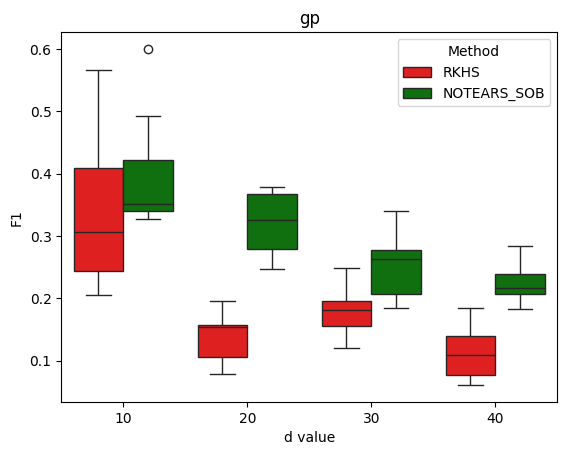

In [89]:
analyse('gp', 'F1', ['RKHS', 'NOTEARS_SOB'], 'green')

    d   Results Method
0  10  0.684211   RKHS
1  10  0.717949   RKHS
2  10  0.694444   RKHS
3  10  0.769231   RKHS
4  10  0.750000   RKHS
5  10  0.701299   RKHS
6  10  0.705882   RKHS
7  10  0.739726   RKHS
8  10  0.831169   RKHS
9  10  0.756757   RKHS
    d   Results Method
0  20  0.362069   RKHS
1  20  0.247619   RKHS
2  20  0.261682   RKHS
3  20  0.315789   RKHS
4  20  0.330275   RKHS
5  20  0.306306   RKHS
6  20  0.291262   RKHS
7  20  0.321429   RKHS
8  20  0.368000   RKHS
9  20  0.400000   RKHS
    d   Results Method
0  30  0.253165   RKHS
1  30  0.371795   RKHS
2  30  0.289474   RKHS
3  30  0.268456   RKHS
4  30  0.263158   RKHS
5  30  0.264151   RKHS
6  30  0.300000   RKHS
7  30  0.267516   RKHS
8  30  0.202703   RKHS
9  30  0.293333   RKHS
    d   Results Method
0  40  0.160428   RKHS
1  40  0.112360   RKHS
2  40  0.161290   RKHS
3  40  0.139037   RKHS
4  40  0.189474   RKHS
5  40  0.217617   RKHS
6  40  0.208333   RKHS
7  40  0.210526   RKHS
8  40  0.186813   RKHS
9  40  0.13

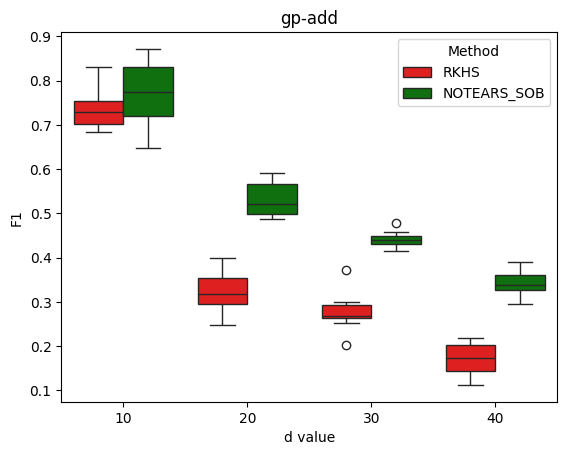

In [90]:
analyse('gp-add', 'F1', ['RKHS', 'NOTEARS_SOB'], 'green')

    d   Results Method
0  10  0.756098   RKHS
1  10  0.575000   RKHS
2  10  0.365854   RKHS
3  10  0.617284   RKHS
4  10  0.641026   RKHS
5  10  0.506024   RKHS
6  10  0.592593   RKHS
7  10  0.682353   RKHS
8  10  0.609756   RKHS
9  10  0.433735   RKHS
    d   Results Method
0  20  0.201439   RKHS
1  20  0.236025   RKHS
2  20  0.233918   RKHS
3  20  0.234483   RKHS
4  20  0.169014   RKHS
5  20  0.352273   RKHS
6  20  0.257669   RKHS
7  20  0.289474   RKHS
8  20  0.329268   RKHS
9  20  0.285714   RKHS
    d   Results Method
0  30  0.173410   RKHS
1  30  0.206897   RKHS
2  30  0.088398   RKHS
3  30  0.202899   RKHS
4  30  0.200913   RKHS
5  30  0.104712   RKHS
6  30  0.098361   RKHS
7  30  0.024691   RKHS
8  30  0.131980   RKHS
9  30  0.104651   RKHS
    d   Results Method
0  40  0.009615   RKHS
1  40  0.063348   RKHS
2  40  0.010256   RKHS
3  40  0.094787   RKHS
4  40  0.143460   RKHS
5  40  0.038095   RKHS
6  40  0.000000   RKHS
7  40  0.028708   RKHS
8  40  0.000000   RKHS
9  40  0.07

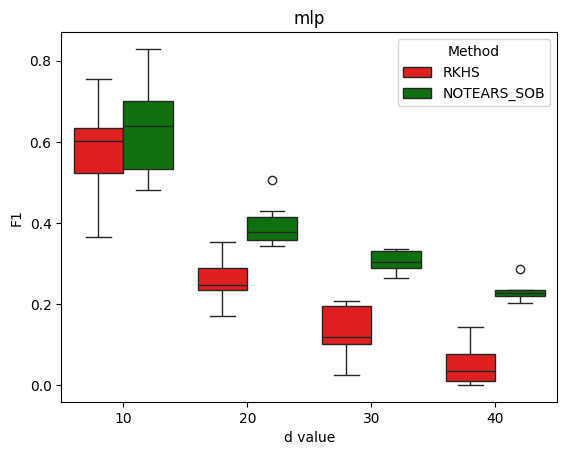

In [91]:
analyse('mlp', 'F1', ['RKHS', 'NOTEARS_SOB'], 'green')

    d   Results Method
0  10  0.694444   RKHS
1  10  0.687500   RKHS
2  10  0.891892   RKHS
3  10  0.750000   RKHS
4  10  0.705882   RKHS
5  10  0.788732   RKHS
6  10  0.645161   RKHS
7  10  0.805556   RKHS
8  10  0.656250   RKHS
9  10  0.655738   RKHS
    d   Results Method
0  20  0.444444   RKHS
1  20  0.313725   RKHS
2  20  0.355140   RKHS
3  20  0.403670   RKHS
4  20  0.415094   RKHS
5  20  0.365385   RKHS
6  20  0.336449   RKHS
7  20  0.330097   RKHS
8  20  0.407767   RKHS
9  20  0.456140   RKHS
    d   Results Method
0  30  0.300000   RKHS
1  30  0.361582   RKHS
2  30  0.414201   RKHS
3  30  0.262500   RKHS
4  30  0.261905   RKHS
5  30  0.323353   RKHS
6  30  0.327044   RKHS
7  30  0.370370   RKHS
8  30  0.360248   RKHS
9  30  0.233766   RKHS
    d   Results Method
0  40  0.262136   RKHS
1  40  0.248705   RKHS
2  40  0.261780   RKHS
3  40  0.192513   RKHS
4  40  0.301508   RKHS
5  40  0.088496   RKHS
6  40  0.260000   RKHS
7  40  0.378641   RKHS
8  40  0.239583   RKHS
9  40  0.30

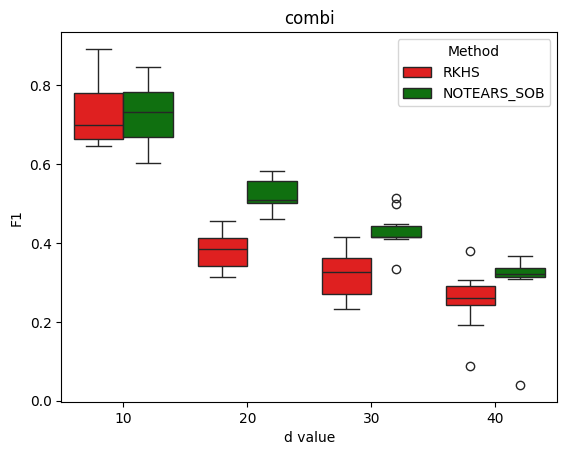

In [92]:
analyse('combi', 'F1', ['RKHS', 'NOTEARS_SOB'], 'green')

# SHD

    d  Results Method
0  10       26   RKHS
1  10       33   RKHS
2  10       24   RKHS
3  10       28   RKHS
4  10       34   RKHS
5  10       37   RKHS
6  10       31   RKHS
7  10       31   RKHS
8  10       34   RKHS
9  10       35   RKHS
    d  Results Method
0  20       79   RKHS
1  20       83   RKHS
2  20       81   RKHS
3  20       81   RKHS
4  20       82   RKHS
5  20       80   RKHS
6  20       84   RKHS
7  20       75   RKHS
8  20       86   RKHS
9  20       78   RKHS
    d  Results Method
0  30      123   RKHS
1  30      125   RKHS
2  30      137   RKHS
3  30      138   RKHS
4  30      128   RKHS
5  30      122   RKHS
6  30      123   RKHS
7  30      127   RKHS
8  30      125   RKHS
9  30      130   RKHS
    d  Results Method
0  40      167   RKHS
1  40      165   RKHS
2  40      157   RKHS
3  40      178   RKHS
4  40      167   RKHS
5  40      172   RKHS
6  40      175   RKHS
7  40      167   RKHS
8  40      161   RKHS
9  40      168   RKHS
    d  Results       Method
0  1

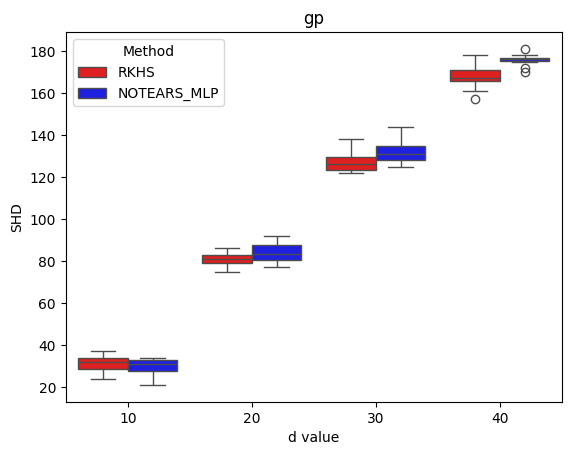

In [79]:
temp_df = analyse('gp', 'SHD', ['RKHS', 'NOTEARS_MLP'], 'blue')

In [77]:
temp_df

,d,Results,Method
0,40,176,NOTEARS_MLP
1,40,172,NOTEARS_MLP
2,40,170,NOTEARS_MLP
3,40,176,NOTEARS_MLP
4,40,181,NOTEARS_MLP
5,40,177,NOTEARS_MLP
6,40,178,NOTEARS_MLP
7,40,176,NOTEARS_MLP
8,40,175,NOTEARS_MLP
9,40,176,NOTEARS_MLP


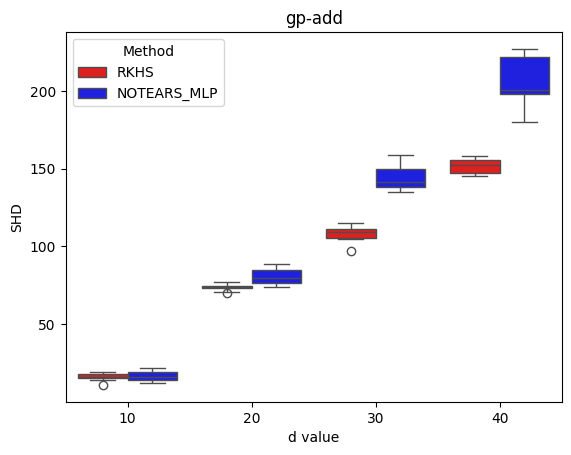

In [68]:
analyse('gp-add', 'SHD', ['RKHS', 'NOTEARS_MLP'], 'blue')

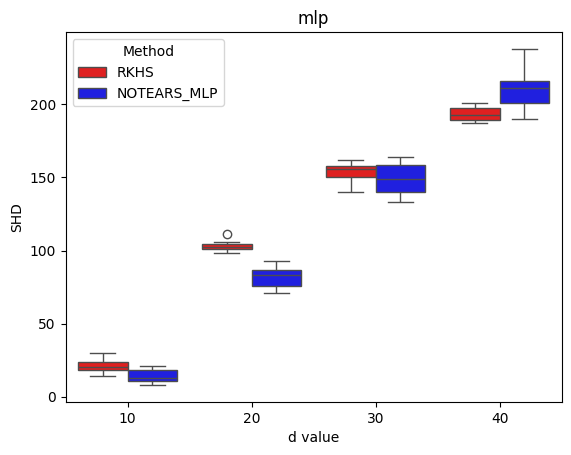

In [69]:
analyse('mlp', 'SHD', ['RKHS', 'NOTEARS_MLP'], 'blue')

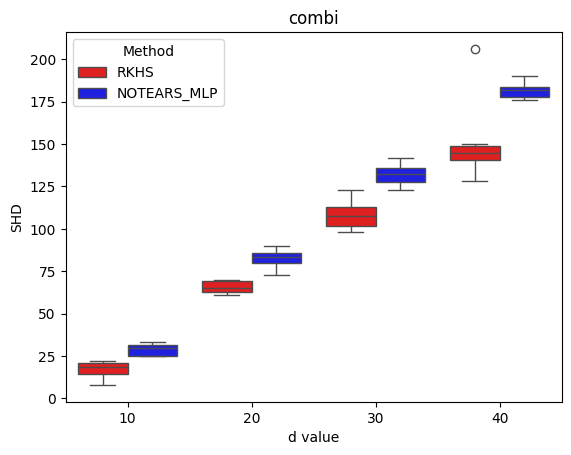

In [70]:
analyse('combi', 'SHD', ['RKHS', 'NOTEARS_MLP'], 'blue')

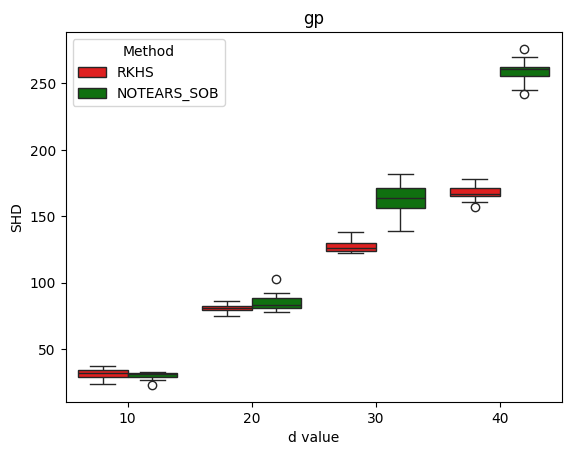

In [71]:
analyse('gp', 'SHD', ['RKHS', 'NOTEARS_SOB'], 'green')

    d  Results Method
0  10       19   RKHS
1  10       16   RKHS
2  10       18   RKHS
3  10       14   RKHS
4  10       15   RKHS
5  10       17   RKHS
6  10       18   RKHS
7  10       16   RKHS
8  10       11   RKHS
9  10       16   RKHS
    d  Results Method
0  20       74   RKHS
1  20       75   RKHS
2  20       76   RKHS
3  20       74   RKHS
4  20       71   RKHS
5  20       74   RKHS
6  20       70   RKHS
7  20       73   RKHS
8  20       77   RKHS
9  20       74   RKHS
    d  Results Method
0  30      114   RKHS
1  30       97   RKHS
2  30      105   RKHS
3  30      107   RKHS
4  30      109   RKHS
5  30      111   RKHS
6  30      111   RKHS
7  30      110   RKHS
8  30      115   RKHS
9  30      105   RKHS
    d  Results Method
0  40      157   RKHS
1  40      155   RKHS
2  40      154   RKHS
3  40      158   RKHS
4  40      151   RKHS
5  40      147   RKHS
6  40      145   RKHS
7  40      147   RKHS
8  40      147   RKHS
9  40      156   RKHS
    d  Results       Method
0  1

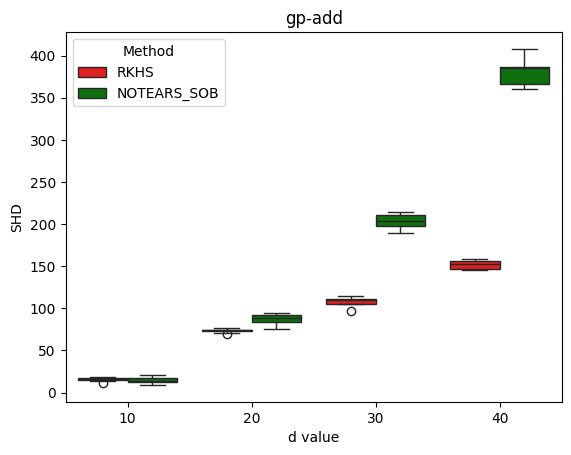

In [80]:
analyse('gp-add', 'SHD', ['RKHS', 'NOTEARS_SOB'], 'green')

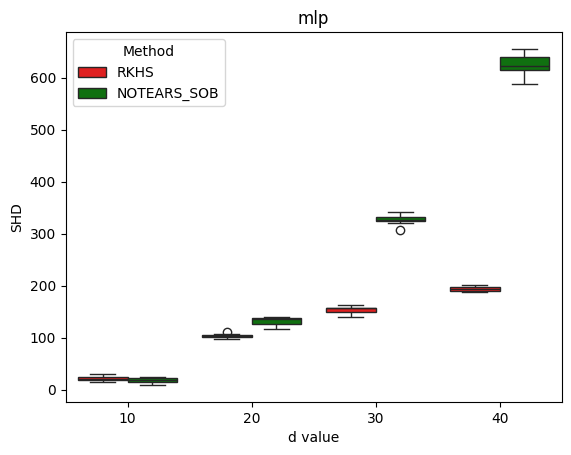

In [73]:
analyse('mlp', 'SHD', ['RKHS', 'NOTEARS_SOB'], 'green')

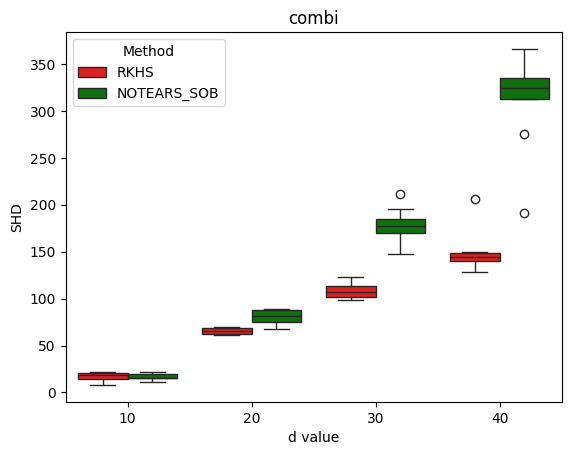

In [74]:
analyse('combi', 'SHD', ['RKHS', 'NOTEARS_SOB'], 'green')

    d  Results Method
0  10       19   RKHS
1  10       16   RKHS
2  10       18   RKHS
3  10       14   RKHS
4  10       15   RKHS
5  10       17   RKHS
6  10       18   RKHS
7  10       16   RKHS
8  10       11   RKHS
9  10       16   RKHS
    d  Results Method
0  20       74   RKHS
1  20       75   RKHS
2  20       76   RKHS
3  20       74   RKHS
4  20       71   RKHS
5  20       74   RKHS
6  20       70   RKHS
7  20       73   RKHS
8  20       77   RKHS
9  20       74   RKHS
    d  Results Method
0  30      114   RKHS
1  30       97   RKHS
2  30      105   RKHS
3  30      107   RKHS
4  30      109   RKHS
5  30      111   RKHS
6  30      111   RKHS
7  30      110   RKHS
8  30      115   RKHS
9  30      105   RKHS
    d  Results Method
0  40      157   RKHS
1  40      155   RKHS
2  40      154   RKHS
3  40      158   RKHS
4  40      151   RKHS
5  40      147   RKHS
6  40      145   RKHS
7  40      147   RKHS
8  40      147   RKHS
9  40      156   RKHS
    d  Results          Method
0

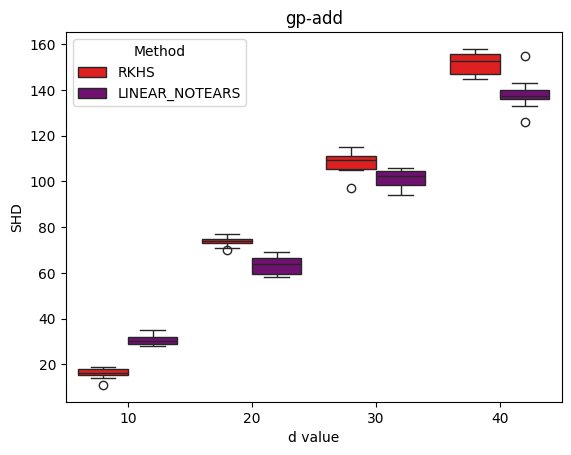

In [4]:
analyse('gp-add', 'SHD', ['RKHS', 'LINEAR_NOTEARS'], 'purple')

    d  Results Method
0  10       26   RKHS
1  10       33   RKHS
2  10       24   RKHS
3  10       28   RKHS
4  10       34   RKHS
5  10       37   RKHS
6  10       31   RKHS
7  10       31   RKHS
8  10       34   RKHS
9  10       35   RKHS
    d  Results Method
0  20       79   RKHS
1  20       83   RKHS
2  20       81   RKHS
3  20       81   RKHS
4  20       82   RKHS
5  20       80   RKHS
6  20       84   RKHS
7  20       75   RKHS
8  20       86   RKHS
9  20       78   RKHS
    d  Results Method
0  30      123   RKHS
1  30      125   RKHS
2  30      137   RKHS
3  30      138   RKHS
4  30      128   RKHS
5  30      122   RKHS
6  30      123   RKHS
7  30      127   RKHS
8  30      125   RKHS
9  30      130   RKHS
    d  Results Method
0  40      167   RKHS
1  40      165   RKHS
2  40      157   RKHS
3  40      178   RKHS
4  40      167   RKHS
5  40      172   RKHS
6  40      175   RKHS
7  40      167   RKHS
8  40      161   RKHS
9  40      168   RKHS
    d  Results          Method
0

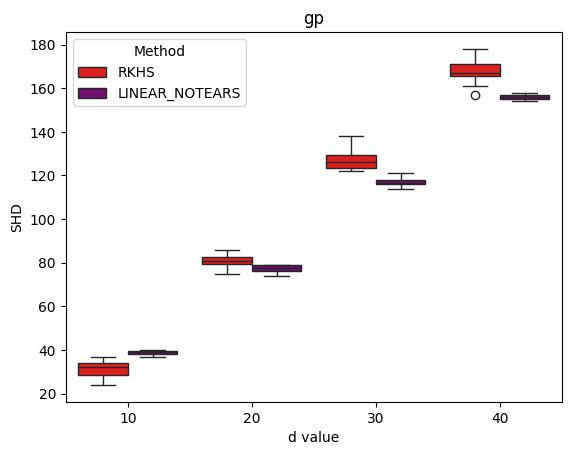

In [5]:
analyse('gp', 'SHD', ['RKHS', 'LINEAR_NOTEARS'], 'purple')

    d  Results Method
0  10       14   RKHS
1  10       22   RKHS
2  10       30   RKHS
3  10       19   RKHS
4  10       18   RKHS
5  10       24   RKHS
6  10       21   RKHS
7  10       16   RKHS
8  10       19   RKHS
9  10       27   RKHS
    d  Results Method
0  20       99   RKHS
1  20      106   RKHS
2  20      111   RKHS
3  20      103   RKHS
4  20      104   RKHS
5  20      101   RKHS
6  20      105   RKHS
7  20       98   RKHS
8  20      101   RKHS
9  20      102   RKHS
    d  Results Method
0  30      140   RKHS
1  30      157   RKHS
2  30      155   RKHS
3  30      157   RKHS
4  30      158   RKHS
5  30      162   RKHS
6  30      153   RKHS
7  30      144   RKHS
8  30      162   RKHS
9  30      149   RKHS
    d  Results Method
0  40      198   RKHS
1  40      192   RKHS
2  40      187   RKHS
3  40      189   RKHS
4  40      200   RKHS
5  40      193   RKHS
6  40      187   RKHS
7  40      197   RKHS
8  40      190   RKHS
9  40      201   RKHS
    d  Results          Method
0

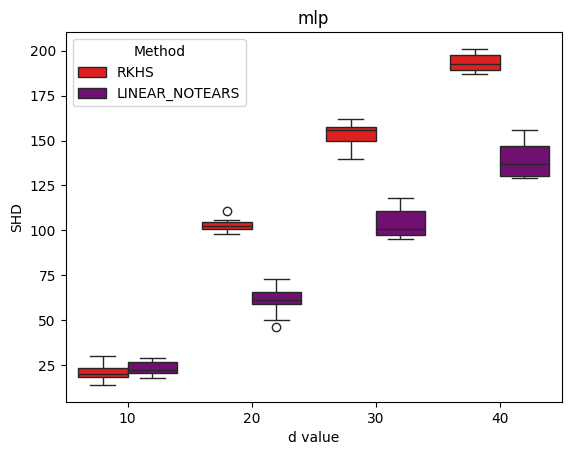

In [6]:
analyse('mlp', 'SHD', ['RKHS', 'LINEAR_NOTEARS'], 'purple')

    d  Results Method
0  10       18   RKHS
1  10       20   RKHS
2  10        8   RKHS
3  10       14   RKHS
4  10       19   RKHS
5  10       15   RKHS
6  10       22   RKHS
7  10       14   RKHS
8  10       21   RKHS
9  10       21   RKHS
    d  Results Method
0  20       65   RKHS
1  20       70   RKHS
2  20       69   RKHS
3  20       65   RKHS
4  20       61   RKHS
5  20       65   RKHS
6  20       69   RKHS
7  20       69   RKHS
8  20       61   RKHS
9  20       62   RKHS
    d  Results Method
0  30      106   RKHS
1  30      113   RKHS
2  30       98   RKHS
3  30      115   RKHS
4  30      123   RKHS
5  30      109   RKHS
6  30      104   RKHS
7  30      100   RKHS
8  30      101   RKHS
9  30      113   RKHS
    d  Results Method
0  40      150   RKHS
1  40      145   RKHS
2  40      140   RKHS
3  40      150   RKHS
4  40      138   RKHS
5  40      206   RKHS
6  40      146   RKHS
7  40      128   RKHS
8  40      144   RKHS
9  40      141   RKHS
    d  Results          Method
0

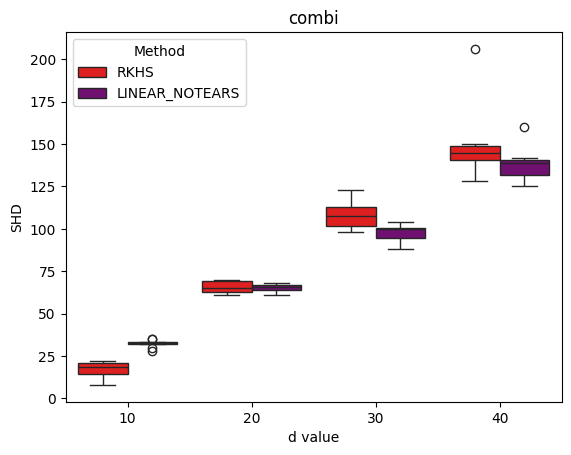

In [7]:
analyse('combi', 'SHD', ['RKHS', 'LINEAR_NOTEARS'], 'purple')

# SID

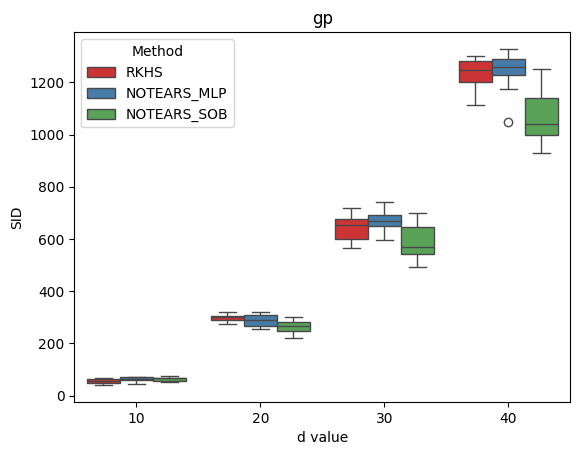

In [41]:
analyse('gp', 'SID')

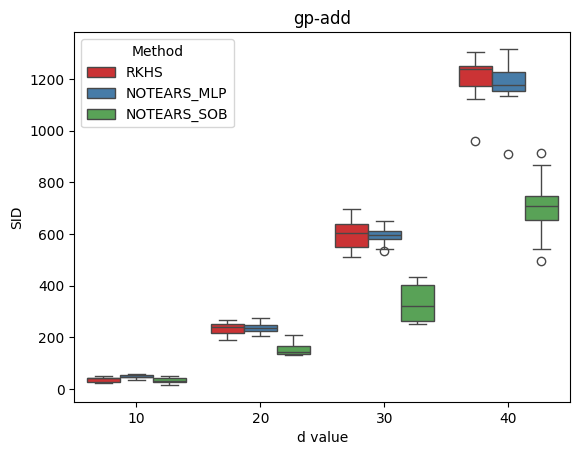

In [42]:
analyse('gp-add', 'SID')

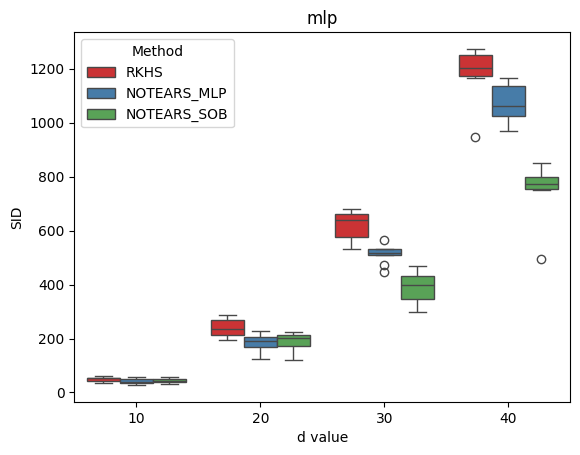

In [43]:
analyse('mlp', 'SID')